In [13]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict

In [14]:
load_dotenv()

True

In [23]:
model = ChatOpenAI()

In [16]:
# create state

class SequenceLLMState(TypedDict):
    original_text: str
    outline: str
    detailed_report: str
    summary: str

In [17]:
def generate_outline(state: SequenceLLMState) -> SequenceLLMState:
    original_text = state["original_text"]

    prompt = f"Generate an outline for {original_text}"

    outline = model.invoke(prompt).content

    state["outline"] = outline

    return state

In [18]:
def generate_detailed_report(state: SequenceLLMState) -> SequenceLLMState:
    original_text = state["original_text"]
    outline = state["outline"]

    prompt = f"Generate a detailed report for {original_text} as per the outline {outline}"
    detailed_report = model.invoke(prompt).content
    state["detailed_report"] = detailed_report
    return state

In [19]:
def generate_summary(state: SequenceLLMState) -> SequenceLLMState:
    detailed_report = state["detailed_report"]

    prompt = f"Generate a summary for {detailed_report}"
    summary = model.invoke(prompt).content
    state["summary"] = summary
    return state

In [20]:
# create a graph
graph = StateGraph(SequenceLLMState)

# add nodes
graph.add_node('generate_outline',generate_outline)
graph.add_node('generate_detailed_report',generate_detailed_report)
graph.add_node('generate_summary',generate_summary)

# add edges
graph.add_edge(START, 'generate_outline')
graph.add_edge('generate_outline',"generate_detailed_report")
graph.add_edge('generate_detailed_report',"generate_summary")
graph.add_edge('generate_summary',END)

# compile graph
workflow = graph.compile()

In [21]:
original_text = """The Importance of Reading

Reading is one of the most powerful tools available to human beings. It is more than just a skill; it is a gateway to knowledge, imagination, self-improvement, and connection with the world. From early childhood to old age, reading plays a crucial role in shaping our thoughts, enhancing our language, and broadening our understanding of the world.

One of the most obvious benefits of reading is the acquisition of knowledge. Books, articles, and journals provide access to information about a wide variety of subjects, from history and science to art and philosophy. A well-read person can draw upon this knowledge to think critically, make informed decisions, and engage in meaningful conversations. In today’s world, where misinformation can spread rapidly, reading from reliable sources helps individuals become more discerning and better equipped to understand complex issues.

Reading also enhances cognitive abilities. It improves vocabulary, grammar, and writing skills by exposing readers to well-structured language and diverse styles. It strengthens memory and concentration, as following a story or argument requires focus and attention to detail. Studies have shown that regular reading can help prevent cognitive decline with age and may even delay the onset of diseases like Alzheimer’s.

In addition to intellectual growth, reading stimulates the imagination and nurtures creativity. Fiction, in particular, transports readers to different worlds, times, and cultures. It allows them to experience the lives of others, leading to greater empathy and emotional intelligence. By stepping into a character’s shoes, readers understand emotions, struggles, and perspectives they may never encounter in real life. This emotional connection can promote kindness, tolerance, and deeper human relationships.

Reading is also a powerful stress-reliever. Immersing oneself in a good book provides a break from the worries and noise of daily life. It offers a safe space to reflect, relax, and reset. For many, reading is not just a pastime but a therapeutic activity that promotes mental well-being. Whether it's a thrilling mystery, a heartwarming novel, or an inspiring biography, reading offers an escape that is both enriching and restorative.

Moreover, reading plays a key role in personal development. Self-help books, motivational literature, and spiritual texts guide individuals on the path of self-discovery and personal growth. They help readers set goals, develop discipline, overcome challenges, and build resilience. Reading about the experiences of others, especially those who have faced and conquered adversity, can inspire confidence and hope.

In education, reading is the foundation for learning across all subjects. Students who read regularly perform better academically because they comprehend instructions better, retain information more effectively, and write with greater clarity. Encouraging reading habits from an early age helps children develop a lifelong love for learning.

In conclusion, reading is not just an academic necessity or a form of entertainment—it is an essential life skill that contributes to intellectual, emotional, and social development. In a fast-paced world dominated by screens and distractions, taking time to read is an investment in one’s own growth and well-being. Cultivating a reading habit can truly transform lives. """

In [24]:
initial_state = {"original_text": original_text}

final_state = workflow.invoke(initial_state)

print (final_state["outline"])
print (final_state["summary"])

I. Introduction
    A. Definition of reading
    B. Importance of reading in today’s society
    C. Thesis statement: Reading is a powerful tool that enhances knowledge, cognitive abilities, creativity, stress-relief, personal development, and education.

II. Acquisition of knowledge
    A. Access to information from various sources
    B. Critical thinking and decision-making
    C. Importance of reading from reliable sources

III. Cognitive abilities
    A. Improvement in vocabulary, grammar, and writing skills
    B. Enhancement of memory and concentration
    C. Prevention of cognitive decline with age

IV. Imagination and creativity
    A. Exploration of different worlds, times, and cultures through fiction
    B. Development of empathy and emotional intelligence
    C. Promotion of kindness, tolerance, and human relationships

V. Stress-relief and mental well-being
    A. Escape from daily worries and noise
    B. Therapeutic benefits of reading
    C. Enriching and restorative e

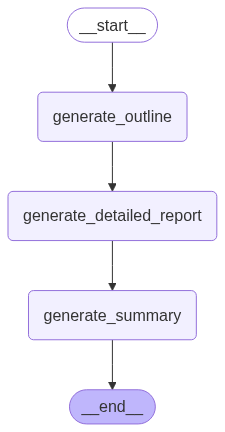

In [25]:
from IPython.display import display, Image
Image(workflow.get_graph().draw_mermaid_png())